#### Importing Libraries

In [143]:
#import the libraries
import pandas as pd
import numpy as np
#import the plotting libraries
import warnings
warnings.filterwarnings("ignore")
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Read CSV file

In [144]:
pd.options.display.float_format = '{:.0f}'.format
df=pd.read_csv("C:\\Users\\karth\\Python\\Course2\\loan_details\\loan.csv")
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,163,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,60,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,68,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [145]:
df.shape


(39717, 111)

# Data Handling and Cleaning

#### Identifying and dropping null values

In [146]:
df.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        40
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [147]:
# drop columns with all NaN's
df = df.dropna(axis=1, how='all')
df.shape

(39717, 61)

In [148]:
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
                            ...  
chargeoff_within_12_mths       56
delinq_amnt                     1
percent_bc_gt_75            39716
pub_rec_bankruptcies          697
tax_liens                      40
Length: 61, dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39717 non-null  int64  
 1   member_id                    39717 non-null  int64  
 2   loan_amnt                    39717 non-null  int64  
 3   funded_amnt                  39717 non-null  int64  
 4   funded_amnt_inv              39717 non-null  float64
 5   term                         39717 non-null  object 
 6   int_rate                     39717 non-null  object 
 7   installment                  39717 non-null  float64
 8   grade                        39717 non-null  object 
 9   sub_grade                    39717 non-null  object 
 10  emp_title                    37258 non-null  object 
 11  emp_length                   38642 non-null  object 
 12  home_ownership               39717 non-null  object 
 13  annual_inc      

In [150]:
null_cols = df.columns[df.isnull().any()]
null_df = df[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                             Null Count  Null Percent
mths_since_last_major_derog       39716           100
percent_bc_gt_75                  39716           100
bc_util                           39716           100
verification_status_joint         39716           100
next_pymnt_d                      38576            97
mths_since_last_record            36930            93
mths_since_last_delinq            25683            65
desc                              12942            33
emp_title                          2459             6
emp_length                         1075             3
pub_rec_bankruptcies                697             2
last_pymnt_d                         71             0
collections_12_mths_ex_med           57             0
chargeoff_within_12_mths             56             0
revol_util                           50             0
tax_liens                            40             0
title                                11             0
last_credit_pull_d          

In [151]:
df=df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','pymnt_plan','url','initial_list_status'],axis=1)
df=df.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','mths_since_last_major_derog','verification_status_joint','bc_util','percent_bc_gt_75'],axis=1)
df.shape

(39717, 44)

In [152]:
#converting to date type
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
#creating new column year_issued
df["year_issued"] = df.issue_d.dt.year

#### Missing Value Treatment

In [153]:
df[['desc','emp_title','title']]=df[['desc','emp_title','title']].fillna('Others')

In [154]:
null_cols = df.columns[df.isnull().any()]
null_df = df[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                    Null Count  Null Percent
emp_length                1075             3
last_pymnt_d                71             0
revol_util                  50             0
last_credit_pull_d           2             0
last_pymnt_amnt              1             0
application_type             1             0


In [155]:
df['emp_title'].value_counts()

emp_title
Others                             2459
US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
                                   ... 
AMEC                                  1
lee county sheriff                    1
Bacon County Board of Education       1
Hotpads                               1
Evergreen Center                      1
Name: count, Length: 28821, dtype: int64

In [156]:
df=df.drop(['emp_title'],axis=1)
df.shape

(39717, 44)

#### Handling Incorrect Data Types 

In [157]:
df['upd_term'] = df['term'].str.replace('months', '')
df['upd_term'] = df['upd_term'].astype(int)

In [158]:
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype(float)

In [159]:
df['Updated_emp_length']=df['emp_length']
df['Updated_emp_length'] = df['Updated_emp_length'].fillna('-1')
df['Updated_emp_length'] = df['Updated_emp_length'].str.replace('years', '')
df['Updated_emp_length'] = df['Updated_emp_length'].str.replace('year', '')
df['Updated_emp_length'] = df['Updated_emp_length'].str.replace('+', '')    
df['Updated_emp_length'] = df['Updated_emp_length'].str.replace('< 1', '0') 
df['Updated_emp_length'] = df['Updated_emp_length'].astype(int)

In [160]:
df['emp_length'] = df['emp_length'].fillna('Data not provided')

In [161]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,year_issued,upd_term,Updated_emp_length
0,1077501,1296599,5000,5000,4975,36 months,11,163,B,B2,...,0,0,0,Jan-15,172,May-16,INDIVIDUAL,2011,36,10
1,1077430,1314167,2500,2500,2500,60 months,15,60,C,C4,...,0,117,1,Apr-13,120,Sep-13,INDIVIDUAL,2011,60,0
2,1077175,1313524,2400,2400,2400,36 months,16,84,C,C5,...,0,0,0,Jun-14,650,May-16,INDIVIDUAL,2011,36,10
3,1076863,1277178,10000,10000,10000,36 months,13,339,C,C1,...,17,0,0,Jan-15,357,Apr-16,INDIVIDUAL,2011,36,10
4,1075358,1311748,3000,3000,3000,60 months,13,68,B,B5,...,0,0,0,May-16,68,May-16,INDIVIDUAL,2011,60,1


#### Sanity check

- Loan amount not less than funded_amnt.

In [162]:
df[(df['funded_amnt_inv']> df['loan_amnt'])].shape

(0, 46)

In [163]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,year_issued,upd_term,Updated_emp_length
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,39717,39717,39717,39717,39717,39717,39716,39717,39717,39717
mean,683132,850464,11219,10948,10397,12,325,68969,2010-11-03 23:26:45.166553344,13,...,12153,11567,9793,2264,1,95,2679,2010,42,5
min,54734,70699,500,500,0,5,16,4000,2007-06-01 00:00:00,0,...,0,0,0,0,0,0,0,2007,36,-1
25%,516221,666780,5500,5400,5000,9,167,40404,2010-05-01 00:00:00,8,...,5577,5112,4600,662,0,0,219,2010,36,2
50%,665665,850812,10000,9600,8975,12,280,59000,2011-02-01 00:00:00,13,...,9899,9288,8000,1349,0,0,546,2011,36,4
75%,837755,1047339,15000,15000,14400,15,431,82300,2011-08-01 00:00:00,19,...,16534,15799,13653,2833,0,0,3293,2011,60,9
max,1077501,1314167,35000,35000,35000,25,1305,6000000,2011-12-01 00:00:00,30,...,58564,58564,35000,23564,180,29623,36115,2011,60,10
std,210694,265678,7457,7187,7128,4,209,63794,NaN,7,...,9042,8943,7066,2608,7,689,4447,1,11,4


# Univariate Analysis


### Annual income

- Annual inome of the applicants is plotted via box plot.
- As the extreme outlier values distorted and obscured the aspects of the box plot removed values above upper fence limit.
- After the outlier entries were removed the average annual income of the applicants is around '$60000'.

In [164]:
#calculating upper fence value
IQR=df['annual_inc'].quantile(0.75)-df['annual_inc'].quantile(0.25)
upper_fence=df['annual_inc'].quantile(0.75) + (1.5*IQR)
print(upper_fence)

145144.0


In [165]:
#removing outliers
df3=df[-(df['annual_inc']>upper_fence)]

count    37874
mean     61360
std      28210
min       4000
25%      40000
50%      56178
75%      78000
max     145008
Name: annual_inc, dtype: float64

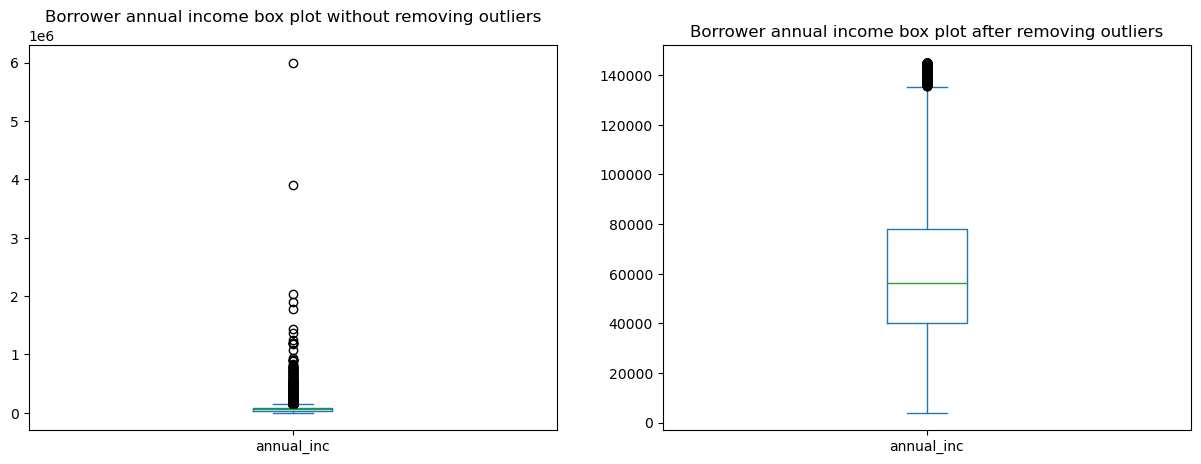

In [166]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
df['annual_inc'].plot.box(ax=axs[0])
axs[0].set_title('Borrower annual income box plot without removing outliers')
df3['annual_inc'].plot.box(ax=axs[1])
axs[1].set_title('Borrower annual income box plot after removing outliers')
df3['annual_inc'].describe()

## Interest Rate



- Interest rates in the dataset ranges from 5% to 25%. <br>
- Interest rates above 22.5% are considered as outliers. <br>
- 25th, 50th and 75 the percentile values are 9%, 12%, 15% respectively.<br>
- According to the Histogram chart the frequency is high at around 11% followed by 7.5% and it gets reduced post 20%.

In [167]:
df['int_rate'].describe()

count   39717
mean       12
std         4
min         5
25%         9
50%        12
75%        15
max        25
Name: int_rate, dtype: float64

Text(0.5, 1.0, 'Box plot for interest rate')

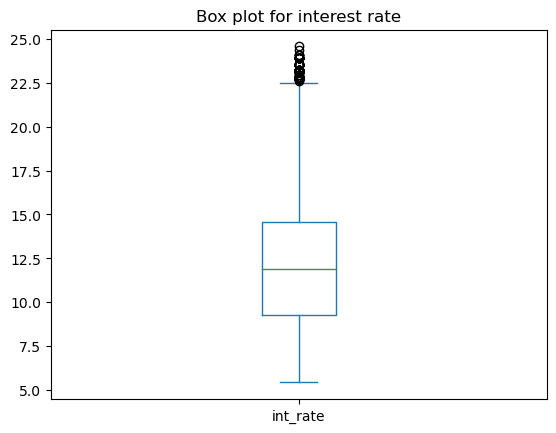

In [168]:
df['int_rate'].plot.box()
plt.title('Box plot for interest rate')

Text(0.5, 1.0, 'Frequency of interest rate provided by the investor')

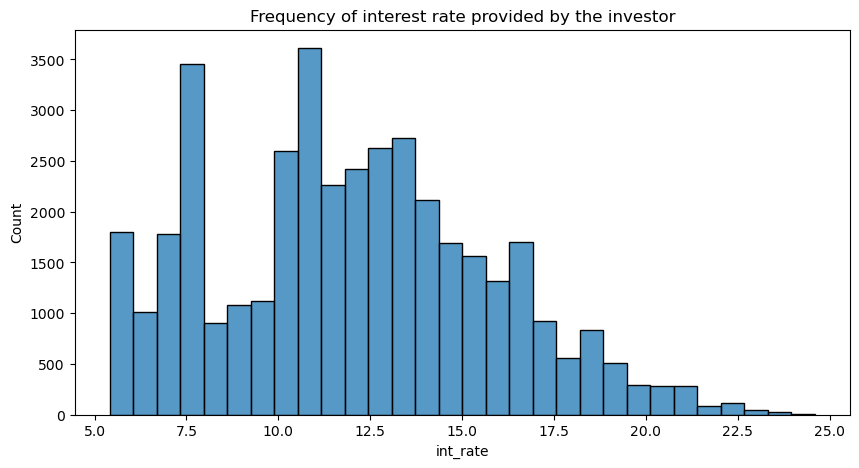

In [169]:
fig, axs = plt.subplots(figsize=(10,5))
sns.histplot(df, x="int_rate", bins=30)
plt.title('Frequency of interest rate provided by the investor')

## Loan Grade

- Lending club has divided loans into 7 grades A (lowest grade) to E (highest grade).
- About 30% of loans issue falls in category B followed by grade A (25%) and grade C (20%)

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

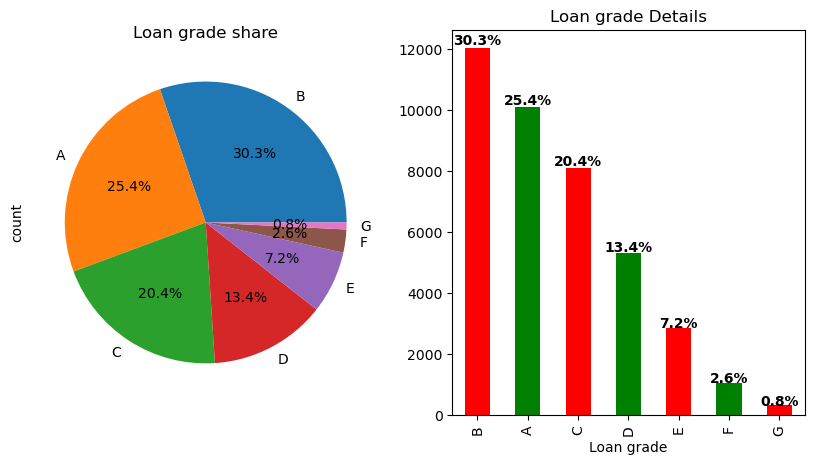

In [170]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
df['grade'].value_counts().plot.pie(autopct='%.1f%%',ax=axs[0])
axs[0].set_title('Loan grade share')
graph=df['grade'].value_counts().plot.bar(color=['red','green'])
plt.title('Loan grade Details')
plt.xlabel('Loan grade')
percentage=(df['grade'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%').tolist()
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i]),
             ha='center',
             weight='bold')
    i += 1
    
df['grade'].value_counts()


## Loan Term

- The consumer finance company is providing loan to its customer with two loan term period options 36 and 60 months.<br>
- Majority of the customers/borrowers are opting for 36 months loan period which amount to 73% of the total loan sanctioned. 

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

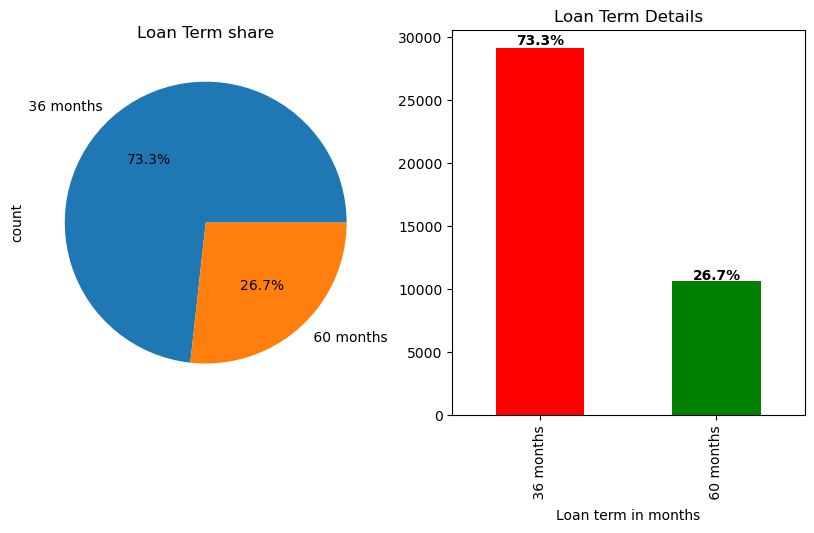

In [171]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
df['term'].value_counts().plot.pie(autopct='%.1f%%',ax=axs[0])
axs[0].set_title('Loan Term share')
graph=df['term'].value_counts().plot.bar(color=['red','green'])
plt.title('Loan Term Details')
plt.xlabel('Loan term in months')
percentage=(df['term'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%').tolist()
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i]),
             ha='center',
             weight='bold')
    i += 1
    
df['term'].value_counts()


### Loan Amount

- Loan amount in the dataset ranges between 500 - 35000 (amount in dollars). <br>
- Loan amount above 30000 are considered as outliers. <br>
- 25th, 50th and 75 the percentile values are 5400, 9600, 15000 respectively. <br>
- According to the Histogram chart the frequency is high at around 5000 followed by 10000.

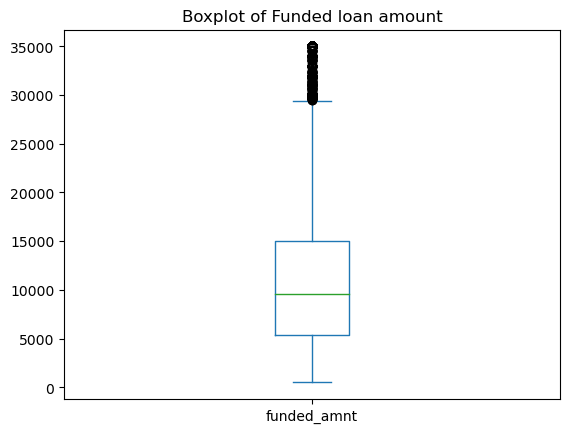

count   39717
mean    10948
std      7187
min       500
25%      5400
50%      9600
75%     15000
max     35000
Name: funded_amnt, dtype: float64

In [172]:
df['funded_amnt'].plot.box()
plt.title('Boxplot of Funded loan amount')
plt.show()
df['funded_amnt'].describe()

Text(0.5, 1.0, 'Frequency of Loan amount sanctioned by the investor')

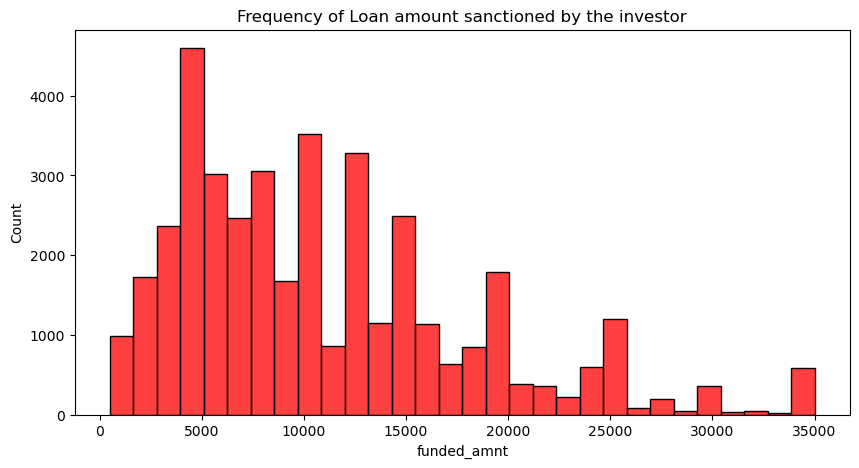

In [173]:
fig, axs = plt.subplots(figsize=(10,5))
sns.histplot(df, x="funded_amnt", bins=30, color='red')
plt.title('Frequency of Loan amount sanctioned by the investor')

### Loan Issued Year

- The dataset provides Loans issued between years 2007-2011.
- Year on year the percentage of loans issued is on a rise.
- About 55% of loans were issue in the year 2011 followed by 2010 and so on.

year_issued
2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

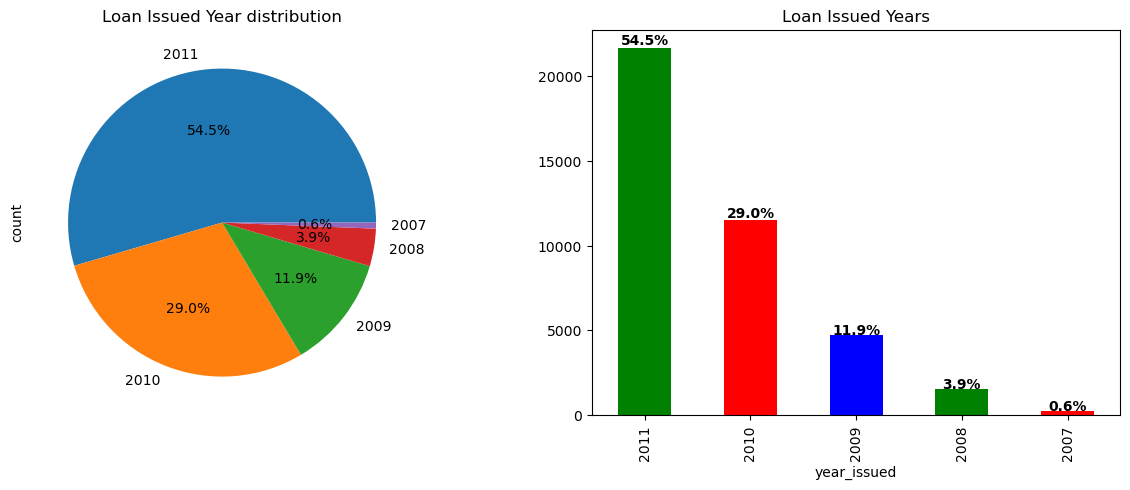

In [174]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
df['year_issued'].value_counts().plot.pie(autopct='%.1f%%',ax=axs[0])
axs[0].set_title('Loan Issued Year distribution')
graph=df['year_issued'].value_counts().plot.bar(color=['green','red','blue'])
plt.title('Loan Issued Years')
plt.xlabel('year_issued')
percentage=(df['year_issued'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%').tolist()
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i]),
             ha='center',
             weight='bold')
    i += 1
    
df['year_issued'].value_counts()

### Borrower's employment experience

- Borrowers who has 10 + years of work experience acquired major chunk of loans from the company followed by borrows with <1 year experience and 2 years experience respectively
- 25th, 50th and 75 the percentile values are 2 years, 4 years, 9 years respectively.

In [175]:
df['Updated_emp_length'].describe()

count   39717
mean        5
std         4
min        -1
25%         2
50%         4
75%         9
max        10
Name: Updated_emp_length, dtype: float64

Text(0.5, 1.0, 'Borrower work experience chart')

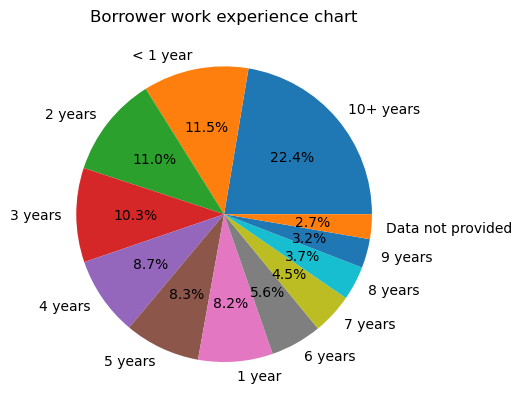

In [176]:
df['emp_length'].value_counts().plot.pie(autopct='%.1f%%')
plt.ylabel('')
plt.title('Borrower work experience chart')

### Loan Status

- About 83% of the applicants have fully paid (principal + interest rate) and the tenure of the loan is completed. <br>
- 2.9 % of the applicant are in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. <br>
- About 14.2% of the applicant have defauted and their loan amount has been 'Charged off', this will be considered as financial loss to the company

In [177]:
df2=df[df['loan_status']=='Charged Off']

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

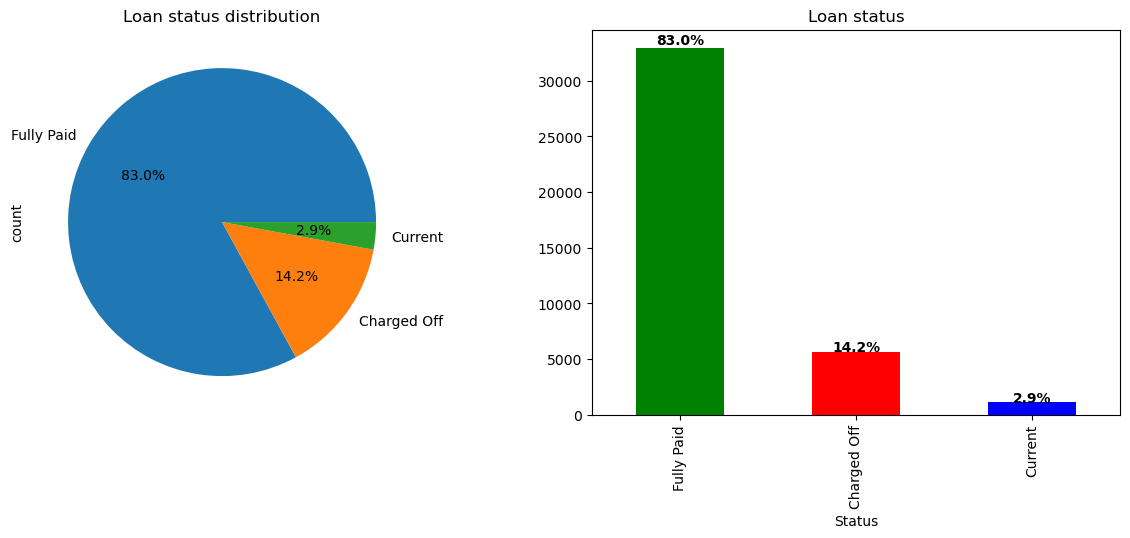

In [178]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
df['loan_status'].value_counts().plot.pie(autopct='%.1f%%',ax=axs[0])
axs[0].set_title('Loan status distribution')
graph=df['loan_status'].value_counts().plot.bar(color=['green','red','blue'])
plt.title('Loan status')
plt.xlabel('Status')
percentage=(df['loan_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%').tolist()
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i]),
             ha='center',
             weight='bold')
    i += 1
    
df['loan_status'].value_counts()

### Loan Purpose

- The major purpose of the applicants borrowing loan from the lending company is due to'debt consolidation' which amount to 46.9% (about half) followed by 'credit card' 12.9%.<br>
- Only 0.8 % of the applicant opt for education loan for vacation it slightly higher 1%.<br>



purpose
debt_consolidation             18641
credit_card                     5129
other                           3993
home_improvement                2976
major_purchase                  2187
small_business                  1828
car                             1549
wedding                          947
medical                          693
moving                           583
vacation                         381
house                            381
educational                      325
renewable_energy                 103
Paying off my son's dept...        1
Name: count, dtype: int64

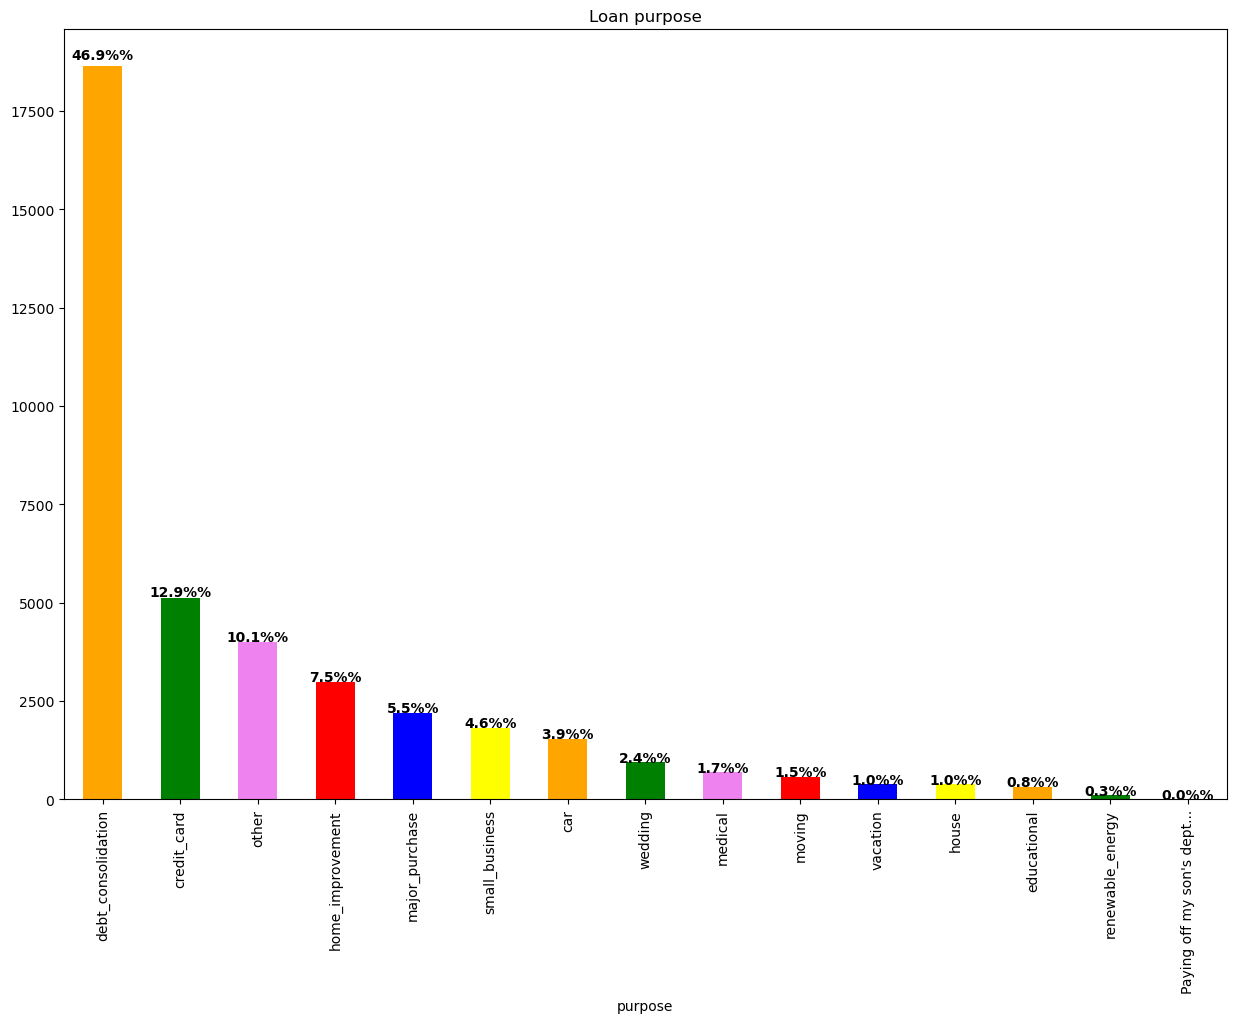

In [179]:
fig, axs = plt.subplots(ncols=1, figsize=(15,10))
graph=df['purpose'].value_counts().plot.bar(color=['orange','green','violet','red','blue','yellow'])
plt.title('Loan purpose')
plt.xlabel('purpose')
percentage=(df['purpose'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%').tolist()

i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i += 1
df['purpose'].value_counts()

### Income Verification status

- For about one third (42.6%) of the loans issued by the lending company, applicant's income was not verfied.
- Only for 32% of the applicants income was verified whereas for about 25% of the applicants income source was verified.

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

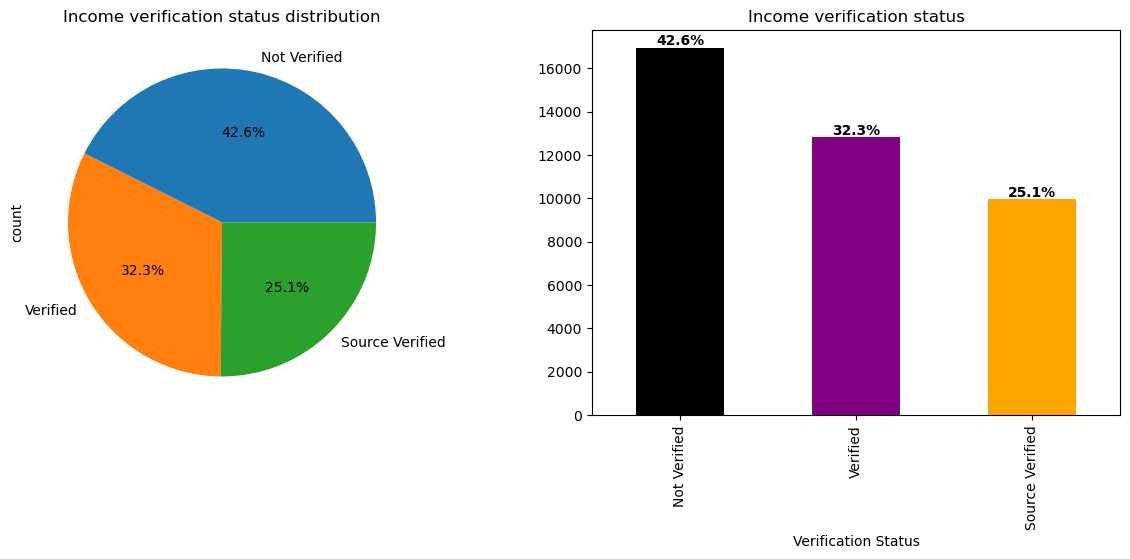

In [180]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
df['verification_status'].value_counts().plot.pie(autopct='%.1f%%',ax=axs[0])
axs[0].set_title('Income verification status distribution')
graph=df['verification_status'].value_counts().plot.bar(color=['black','purple','orange'])
plt.title('Income verification status')
plt.xlabel('Verification Status')
percentage=(df['verification_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%').tolist()
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i]),
             ha='center',
             weight='bold')
    i += 1
    
df['verification_status'].value_counts()

### Applicant's State (Region)

- Around 7000 applicants who borrowed Loan from the Lending company comes from 'California' followed by New York which has nearly 3800 applicants

Text(0.5, 1.0, 'Applicant State (Region) distribution')

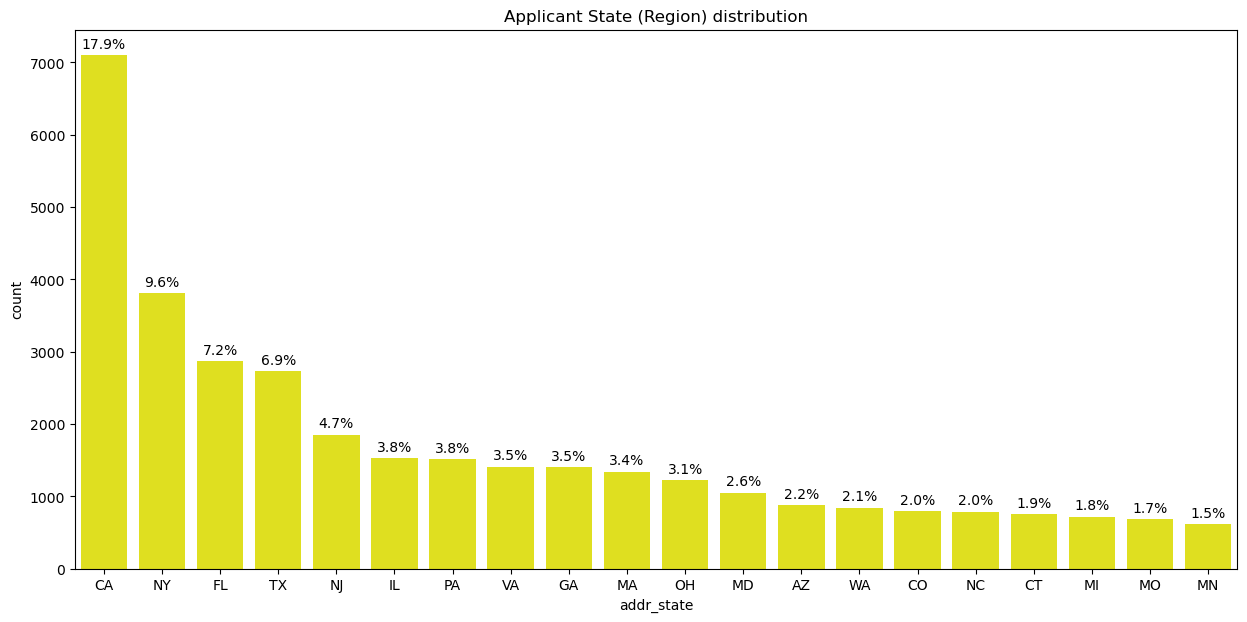

In [181]:
fig, axs = plt.subplots(ncols=1, figsize=(15,7))
plots=sns.countplot( x = 'addr_state', data = df, color = 'yellow', 
              order = df['addr_state'].value_counts().index[:20]);
for bar in plots.patches:
    percentage=round(((bar.get_height()/df['id'].count())*100),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Applicant State (Region) distribution')

# Bivariate Analysis

### Borrower's home ownership status vs Loan Status (Defaulted/Charged off)

- Plotted a Bar graph between applicant's home owenership status and charged off loan status to get analyse whether home ownership parameter affects loan repaymenent.
- The bar graph shows among the defaulted / charged off loan around 90% of applicants home ownership status is either 'Rent'(50%) or 'Mortgage'(41%).

In [182]:
df=df[-(df['home_ownership']=='NONE')]
df['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
Name: count, dtype: int64

In [183]:
df1=df[df['loan_status']=='Charged Off']
df1['id'].count()

5627

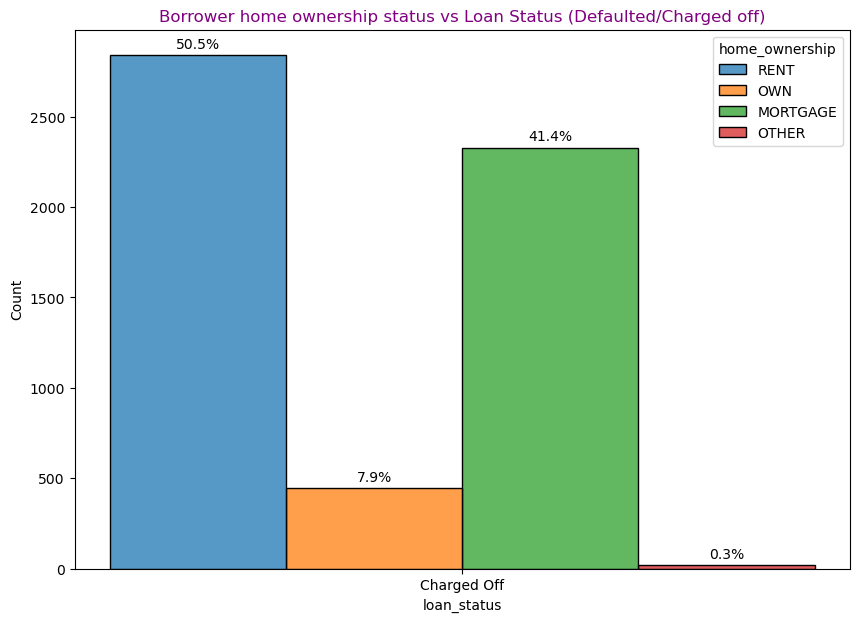

In [184]:
fig, axs = plt.subplots(ncols=1, figsize=(10,7))
plots=sns.histplot(binwidth=0.5, x="loan_status", hue="home_ownership", data=df1, stat="count", multiple="dodge")
plt.title('Borrower home ownership status vs Loan Status (Defaulted/Charged off)',color='purple')
for bar in plots.patches:
    percentage=round(((bar.get_height()/df1['id'].count())*100),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

### Interest Rate Vs Loan Status

- Plotted heat map between Interest rate and Loan status to get a behavioral insights between them.
- Divided interest rates into 4 category "Low" for interest rates between 5%-8%, "Nominal" between 9%-11%, "High" between 12%-14% and "High risk" between 15-25%.
- Heat map shows more number of applicants were able to close the loan when the interest rate is low and it is gradually decreases with increase in interest rate.
- In contrast there is an increase in loans getting defaulted when the interest rate is high. 

In [185]:
df['int_rate'].describe()

count   39714
mean       12
std         4
min         5
25%         9
50%        12
75%        15
max        25
Name: int_rate, dtype: float64

In [186]:
df['int_rate_Bucket'] = pd.qcut(df['int_rate'], [0, 0.25, 0.5, 0.75,1], ["Low:5-8%","Nominal:9%-11%","High:12%-14%","High_risk:15%-25%"])

In [187]:
res = pd.pivot_table(data=df,index="loan_status",columns="int_rate_Bucket",values='int_rate',aggfunc='count')
print(res)

int_rate_Bucket  Low:5-8%  Nominal:9%-11%  High:12%-14%  High_risk:15%-25%
loan_status                                                               
Charged Off           600            1192          1524               2311
Current                42             217           305                576
Fully Paid           9383            8798          7821               6945


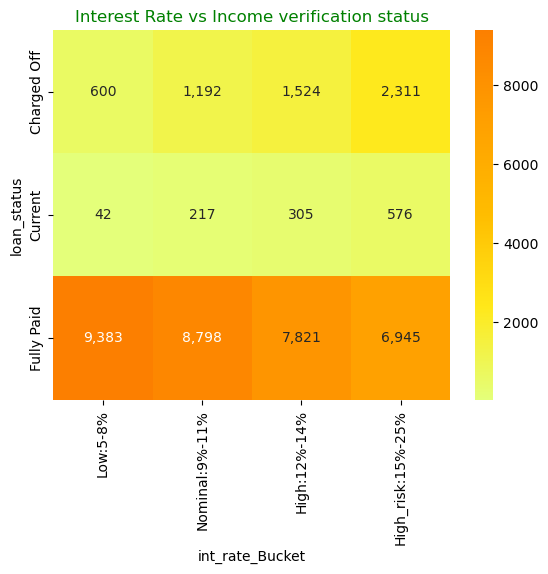

In [188]:
sns.heatmap(res,cmap = "Wistia", annot=True, fmt=',d')
plt.title('Interest Rate vs Income verification status',color='green')
plt.show()

### Loan Status Vs Income Verification status

- Plotted heat map between Loan status and income verification status to get a behavioral insights between them.
- Able to see that income verification status doesn't affect the loan status as the Loans which were closed / fully paid when the applicant's income was not verified is high compared to applican't whose income were verified.
- Also for defaulted or charged off loan there is a very minimal difference when applicant's income 'Not verified' or 'verified'.

In [189]:
res = pd.pivot_table(data=df,index="loan_status",columns="verification_status",values="member_id",aggfunc='count')
print(res)

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                  2142             1434      2051
Current                       227              310       603
Fully Paid                  14549             8243     10155


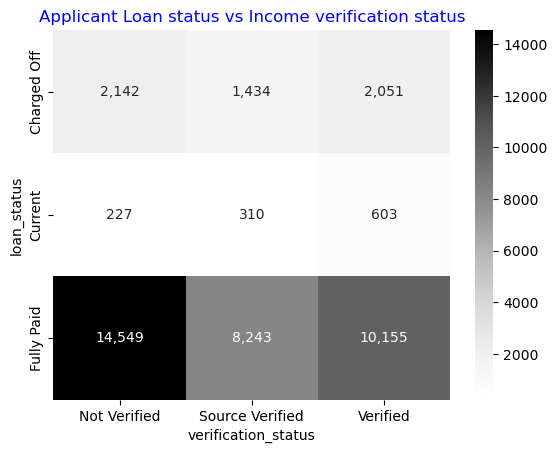

In [190]:
sns.heatmap(res,cmap = "Greys", annot=True, fmt=',d')
plt.title('Applicant Loan status vs Income verification status',color='blue')
plt.show()

### Annual income Vs Loan status

- Plotted a Bar graph between applicant's annual income and charged off loan status to get analyse whether applicant's annual income parameter affects loan repayment.
- Divided interest rates into 4 categories "<40000", "40000-60000", "60000-80000" and ">80000" according to applicant's annual income.
- The bar graph shows that when the annual income increase the possibility of loan getting charged off / defaulted decreases.

In [191]:
df3['annual_inc_bucket']=pd.qcut(df['annual_inc'], [0, 0.25, 0.5, 0.75,1], ["<$40000", "$40000-$60000", "$60000-$80000", ">$80000"])

In [192]:
df4=df3[df3['loan_status']=='Charged Off']

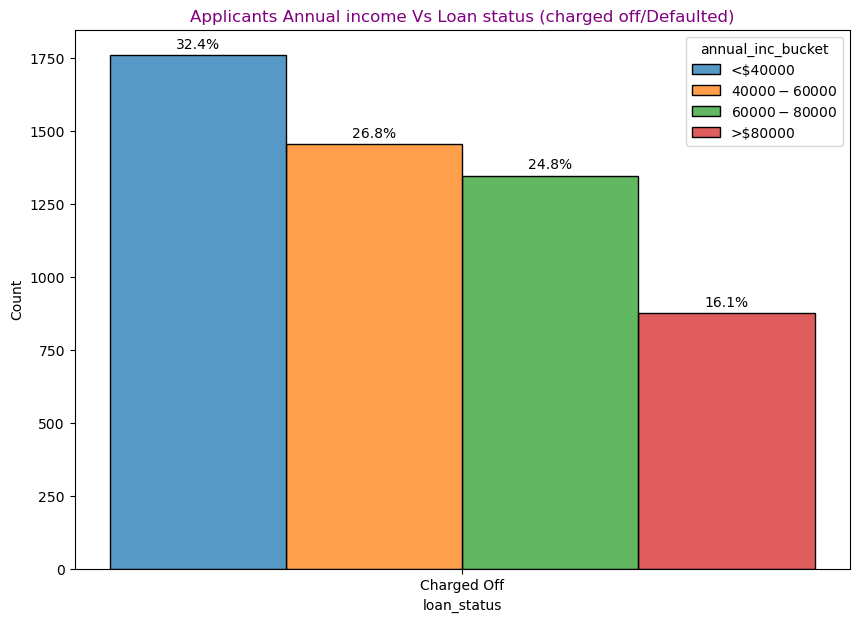

In [193]:
fig, axs = plt.subplots(ncols=1, figsize=(10,7))
plots=sns.histplot(binwidth=0.5, x="loan_status", hue="annual_inc_bucket", data=df4, stat="count", multiple="dodge")
plt.title('Applicants Annual income Vs Loan status (charged off/Defaulted)',color='purple')
plt.style.use('default') 
for bar in plots.patches:
    percentage=round(((bar.get_height()/df4['id'].count())*100),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

### Loan Term Vs Loan status

- Plotted a Bar graph between applicant's loan term and charged off loan status to get analyse whether applicant's loan term affects loan repayment.
- According to Fig 1 the charged off proportion of loan with loan term as 60 months (25%) is higher than loans with loan term as 36 months. 
- According to Fig 2 out of the total charged off loans, 36 months loan term loans are defaulted/charged off more than (57%) the loans with loan term as 60 months (43%).

In [214]:
loan_term_vs_loan_status = df.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_term_vs_loan_status['Total'] = loan_term_vs_loan_status['Charged Off'] + loan_term_vs_loan_status['Fully Paid'] 
loan_term_vs_loan_status['Charged off %'] = (loan_term_vs_loan_status['Charged Off'] / loan_term_vs_loan_status['Total']*100)

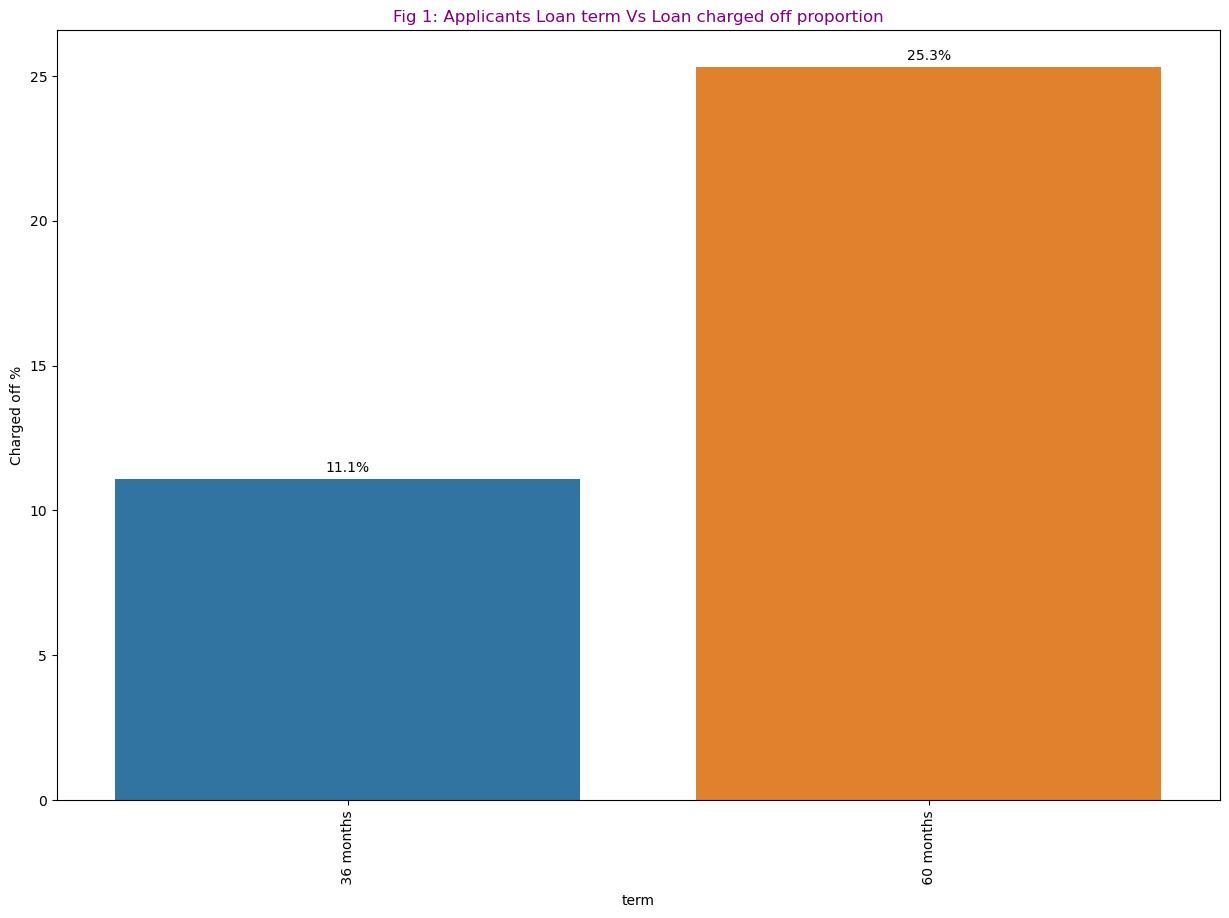

In [217]:
fig, axs = plt.subplots(ncols=1, figsize=(15,10))
plots=sns.barplot( y="Charged off %", x="term", data=loan_term_vs_loan_status)
for bar in plots.patches:
    percentage=round(bar.get_height(),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Fig 1: Applicants Loan term Vs Loan charged off proportion',color='purple')
plt.xticks(rotation=90)

plt.show()

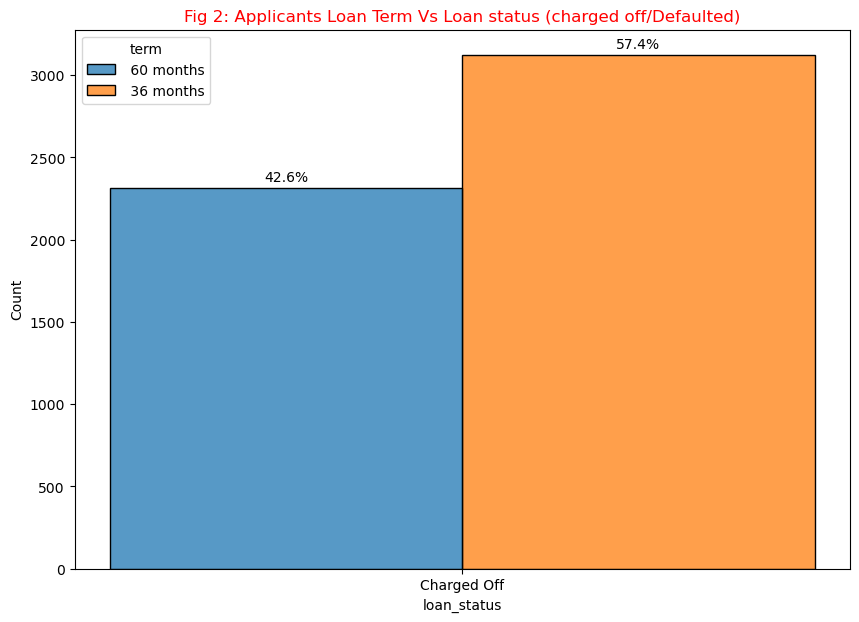

In [216]:
fig, axs = plt.subplots(ncols=1, figsize=(10,7))
plots=sns.histplot(binwidth=0.5, x="loan_status", hue="term", data=df4, stat="count", multiple="dodge")
plt.title('Fig 2: Applicants Loan Term Vs Loan status (charged off/Defaulted)',color='red')
for bar in plots.patches:
    percentage=round(((bar.get_height()/df4['id'].count())*100),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

### Debt to Income Ratio (DTI) Vs Loan Status

- Plotted a Box plot between applicant's debt to income ration (DTI) and loan status to get analyse whether applicant's DTI affects loan repayment.
- For charged off / defaulted loans the debt to income ratio is higher than 'Fully paid' loans.
- Current loans are having slightly higher DTI ratio than charged off or defaulted loan. The probability of current loans getting defaulted is high.

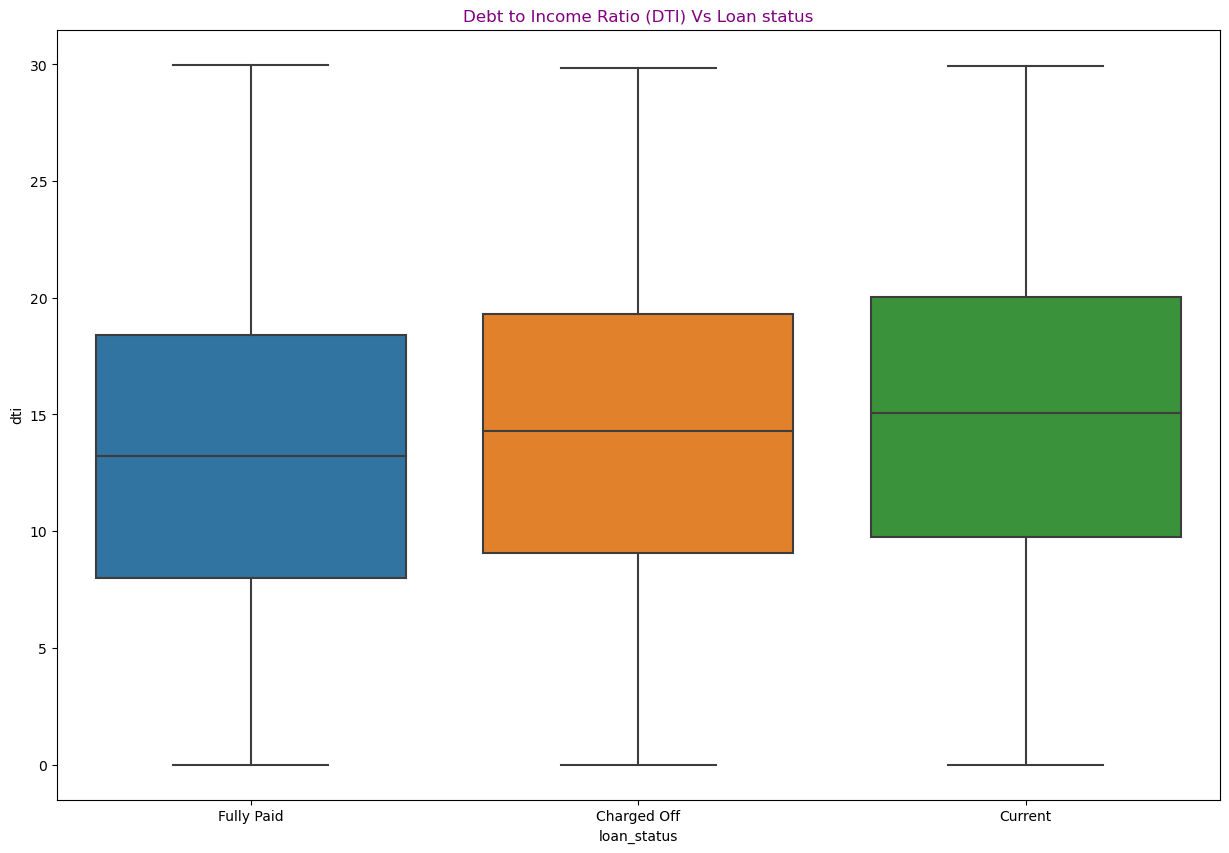

In [195]:
fig, axs = plt.subplots(ncols=1, figsize=(15,10))
sns.boxplot(x="loan_status", y="dti", data=df)
plt.title('Debt to Income Ratio (DTI) Vs Loan status',color='purple')
plt.show()

### Loan Purpose Vs Loan Status

- Fig 1 bar plot plotted among charged off loan data indicates the nearly half of the defaulted / charged off loans are opted for the purpose of debt consolidation followed by loans opted for other purposes.
- Fig 2 bar plot plotted by calculating charged off proportion among individual purposes indicates small business loans has high charged off proportion (27%) followed by renewable energy (18%)
- By analysing the two plot the risk loan purposes are 'debt consolidationn' and 'small business'
 

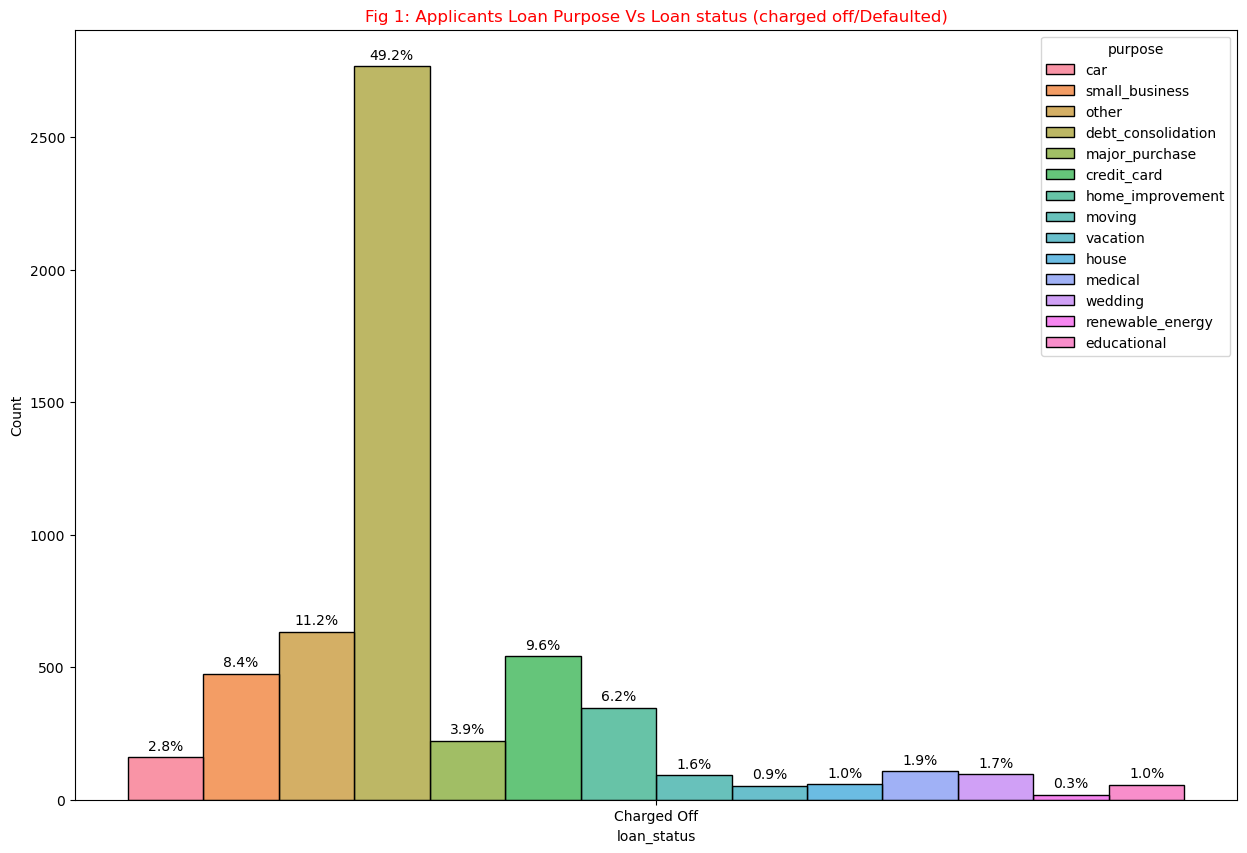

In [196]:
fig, axs = plt.subplots(ncols=1, figsize=(15,10))
plots=sns.histplot(binwidth=0.5, x="loan_status", hue="purpose", data=df2, stat="count", multiple="dodge")
plt.title('Fig 1: Applicants Loan Purpose Vs Loan status (charged off/Defaulted)',color='red')
for bar in plots.patches:
    percentage=round(((bar.get_height()/df2['id'].count())*100),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [197]:
loan_purpose_vs_loan_status = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_purpose_vs_loan_status['Total'] = loan_purpose_vs_loan_status['Charged Off'] + loan_purpose_vs_loan_status['Fully Paid'] 
loan_purpose_vs_loan_status['Charged off %'] = (loan_purpose_vs_loan_status['Charged Off'] / loan_purpose_vs_loan_status['Total']*100)


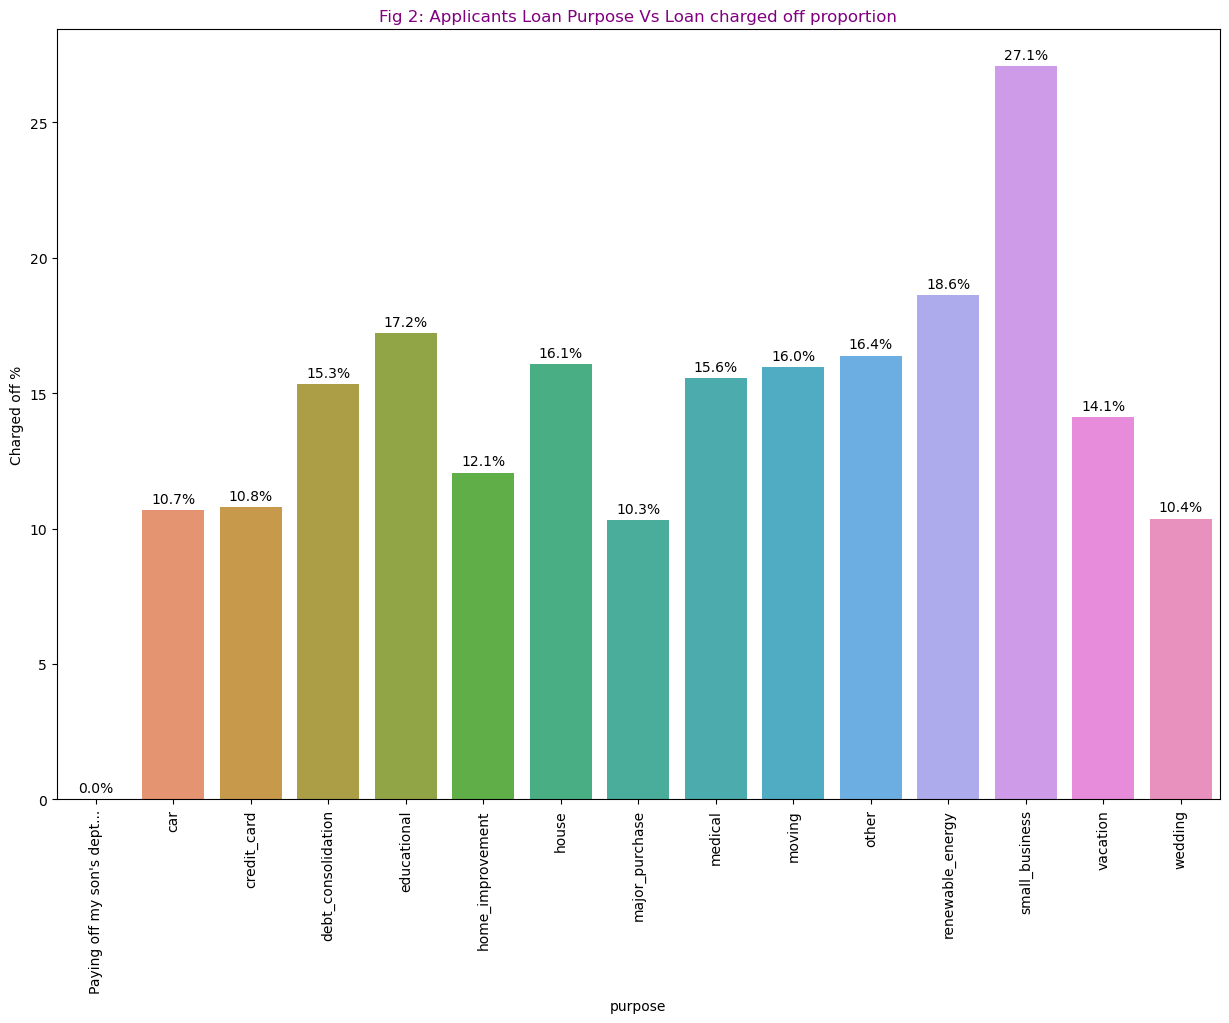

In [198]:
fig, axs = plt.subplots(ncols=1, figsize=(15,10))
plots=sns.barplot( y="Charged off %", x="purpose", data=loan_purpose_vs_loan_status)
for bar in plots.patches:
    percentage=round(bar.get_height(),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Fig 2: Applicants Loan Purpose Vs Loan charged off proportion',color='purple')
plt.xticks(rotation=90)

plt.show()

### Loan amount Vs Loan Status

- The line plot indicates loans getting charged off or defaulted increase with increase in loan amount

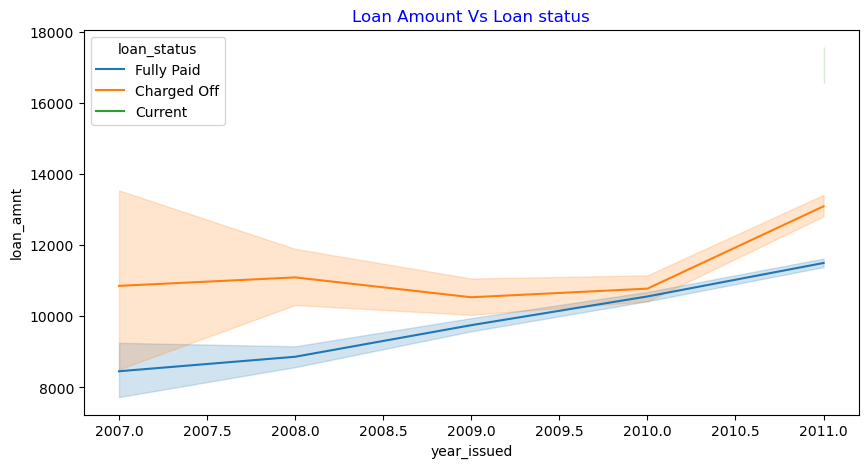

In [199]:
fig, axs = plt.subplots(ncols=1, figsize=(10,5))
graph=sns.lineplot(data =df ,y='loan_amnt', x='year_issued', hue ='loan_status')
plt.title('Loan Amount Vs Loan status',color='blue')
plt.show()

### Loan Grade Vs Loan status

- Fig 1 bar plot plotted among charged off loan data indicates loans with grade 'B' and 'C' have high defaulted percentage 25% and 24% respectively.
- Fig 2 bar plot plotted by calculating charged off proportion among individual grades indicates loan grade 'G' has high charged off proportion (34%) followed by grade F (33%)
- By analysing the two plot the risk loan grades are 'C' and 'F'
 

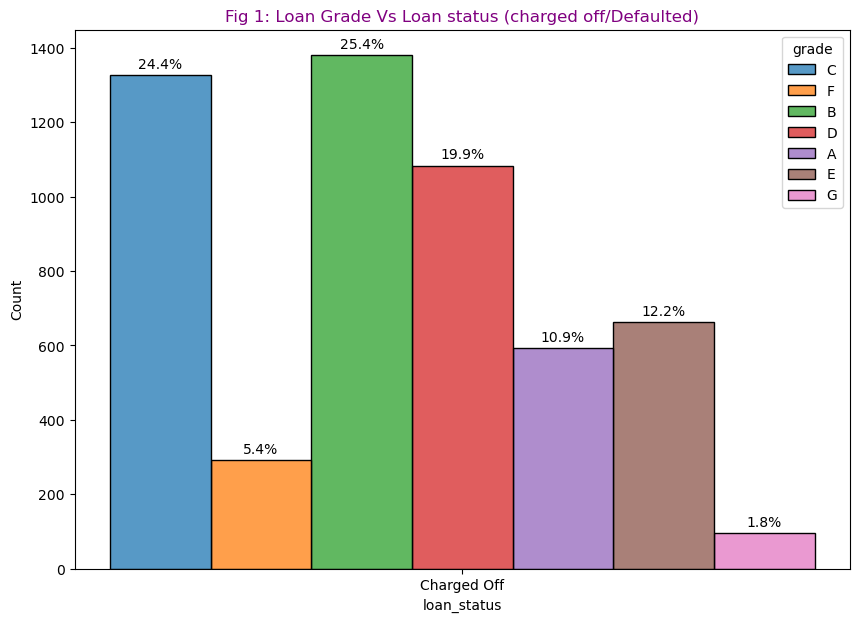

In [200]:
fig, axs = plt.subplots(ncols=1, figsize=(10,7))
plots=sns.histplot(binwidth=0.5, x="loan_status", hue="grade", data=df4, stat="count", multiple="dodge")
plt.title('Fig 1: Loan Grade Vs Loan status (charged off/Defaulted)',color='purple')
for bar in plots.patches:
    percentage=round(((bar.get_height()/df4['id'].count())*100),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [201]:
Loan_Grade_vs_loan_status = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Loan_Grade_vs_loan_status['Total'] = Loan_Grade_vs_loan_status['Charged Off'] + Loan_Grade_vs_loan_status['Fully Paid'] 
Loan_Grade_vs_loan_status['Charged off %'] = (Loan_Grade_vs_loan_status['Charged Off'] / Loan_Grade_vs_loan_status['Total']*100)


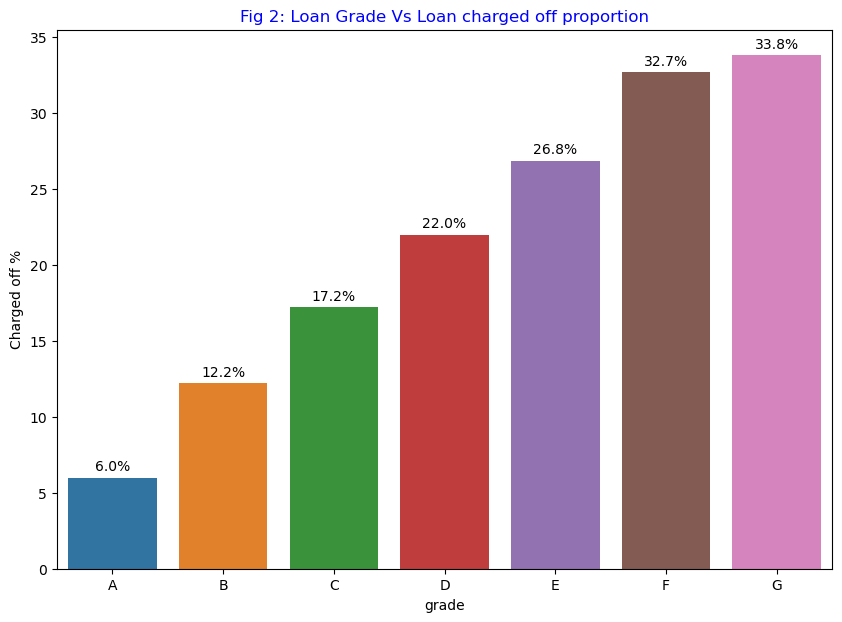

In [202]:
fig, axs = plt.subplots(ncols=1, figsize=(10,7))
plt.style.use('default')
plots=sns.barplot( y="Charged off %", x="grade", data=Loan_Grade_vs_loan_status)
for bar in plots.patches:
    percentage=round(bar.get_height(),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Fig 2: Loan Grade Vs Loan charged off proportion',color='blue')
plt.xticks(rotation=0)

plt.show()

### Applicants employment length Vs Loan status

- Fig 1 bar plot plotted among charged off loan data indicates charged off loans are high when applicant's employment lenght is over 10+ year (24%) followed by '<1 year' (11%)
- Fig 2 bar plot plotted by calculating charged off proportion among individual grades indicates applican't who hasn't furnished employment details have high charged off ratio (22%)
- By analysing the two plot the risk loan employment lengths are 10+ years and < 1 year.

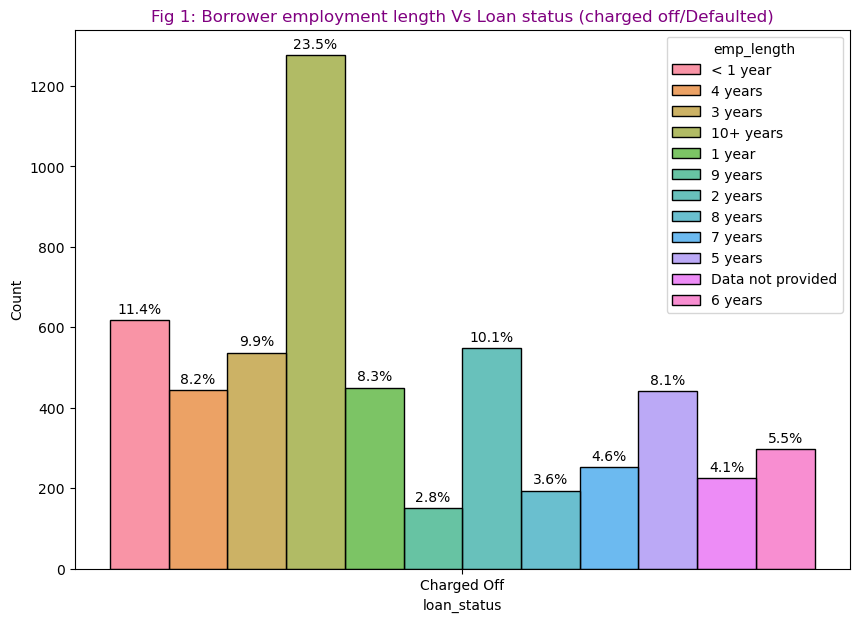

In [203]:
fig, axs = plt.subplots(ncols=1, figsize=(10,7))
plots=sns.histplot(binwidth=0.5, x="loan_status", hue="emp_length", data=df4, stat="count", multiple="dodge")
plt.title('Fig 1: Borrower employment length Vs Loan status (charged off/Defaulted)',color='purple')
for bar in plots.patches:
    percentage=round(((bar.get_height()/df4['id'].count())*100),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

In [204]:
emp_vs_loan_status = df3.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_vs_loan_status['Total'] = emp_vs_loan_status['Charged Off'] + emp_vs_loan_status['Fully Paid'] 
emp_vs_loan_status['Charged off %'] = (emp_vs_loan_status['Charged Off'] / emp_vs_loan_status['Total']*100)

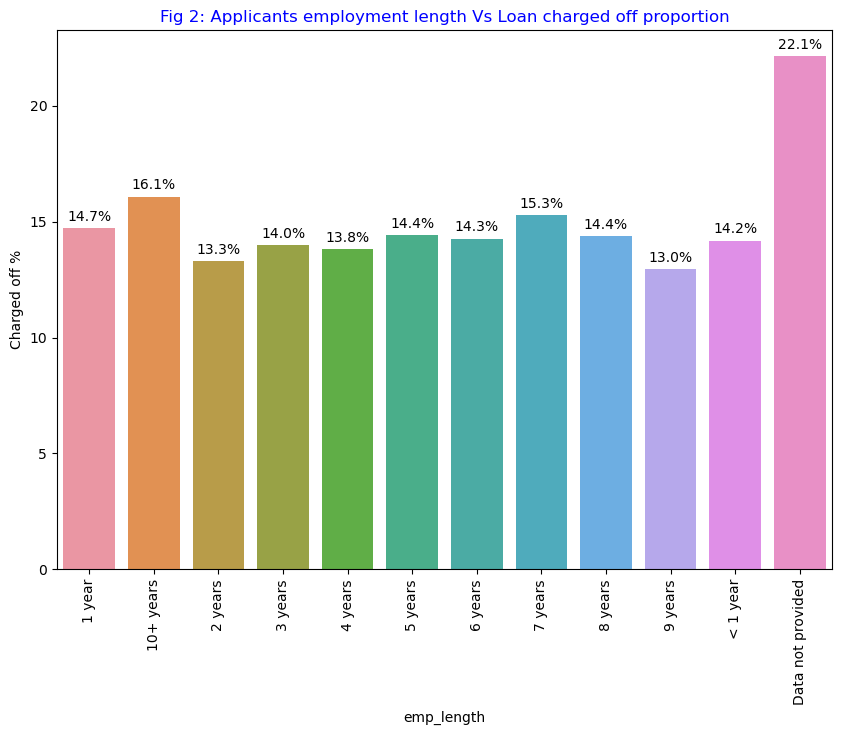

In [205]:
fig, axs = plt.subplots(ncols=1, figsize=(10,7))
plots=sns.barplot( y="Charged off %", x="emp_length", data=emp_vs_loan_status)
for bar in plots.patches:
    percentage=round(bar.get_height(),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Fig 2: Applicants employment length Vs Loan charged off proportion',color='blue')
plt.xticks(rotation=90)

plt.show()

### Applicant's State (Region) Vs Loan Status

- Fig 1 bar plot plotted among charged off loan data indicates around 20 % charged off loans comes from 'California' region followed by 'Florida' (9%) and 'New York' (8.6%).
- Fig 2 bar plot plotted by calculating charged off proportion among individual states indicates about 60% of loans that comes from 'Nebraska' region are charged off.
- By analysing the two plot the risk states are 'California', 'Florida', 'New York' and 'Nebraska'.

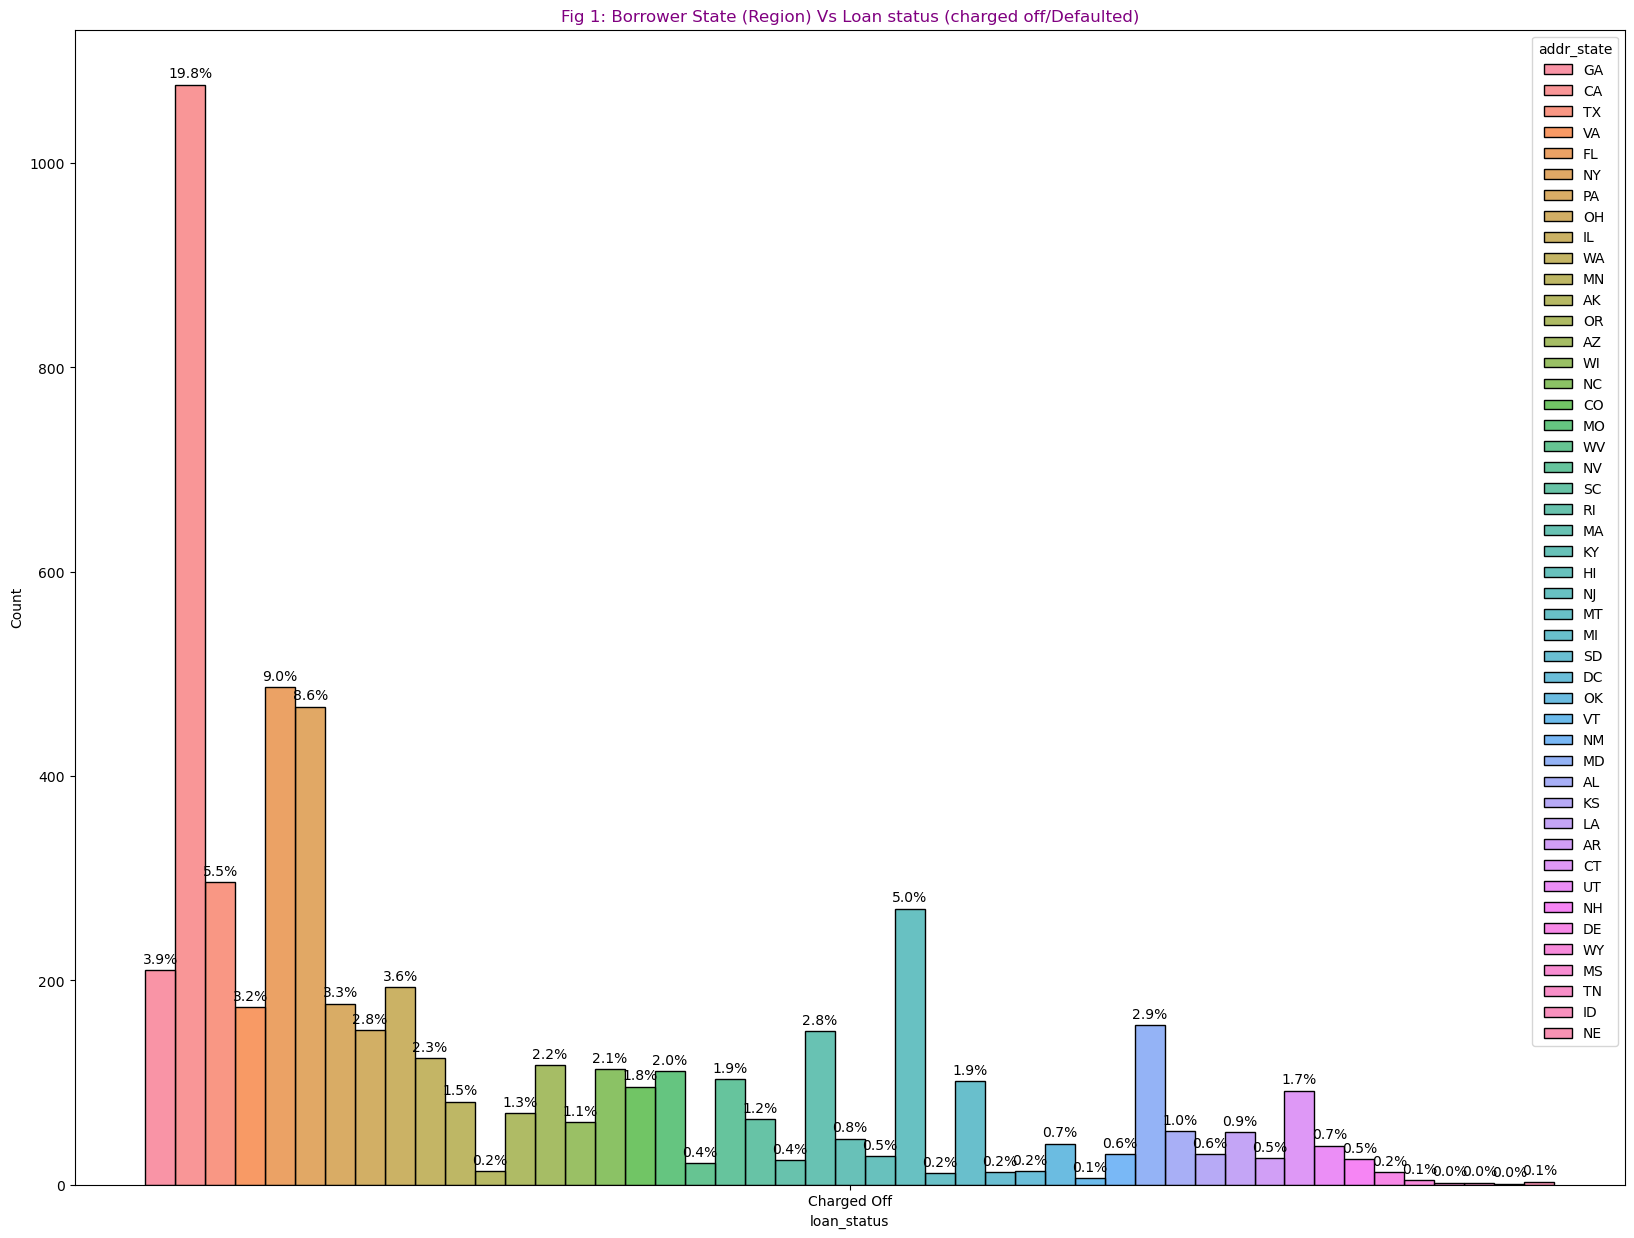

In [206]:
fig, axs = plt.subplots(ncols=1, figsize=(20,15))
plots=sns.histplot(binwidth=0.5, x="loan_status", hue="addr_state", data=df4, stat="count", multiple="dodge")
plt.title('Fig 1: Borrower State (Region) Vs Loan status (charged off/Defaulted)',color='purple')
for bar in plots.patches:
    percentage=round(((bar.get_height()/df4['id'].count())*100),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

In [207]:
state_vs_loan_status = df3.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan_status['Total'] = state_vs_loan_status['Charged Off'] + state_vs_loan_status['Fully Paid'] 
state_vs_loan_status['Charged off %'] = (state_vs_loan_status['Charged Off'] / state_vs_loan_status['Total']*100)

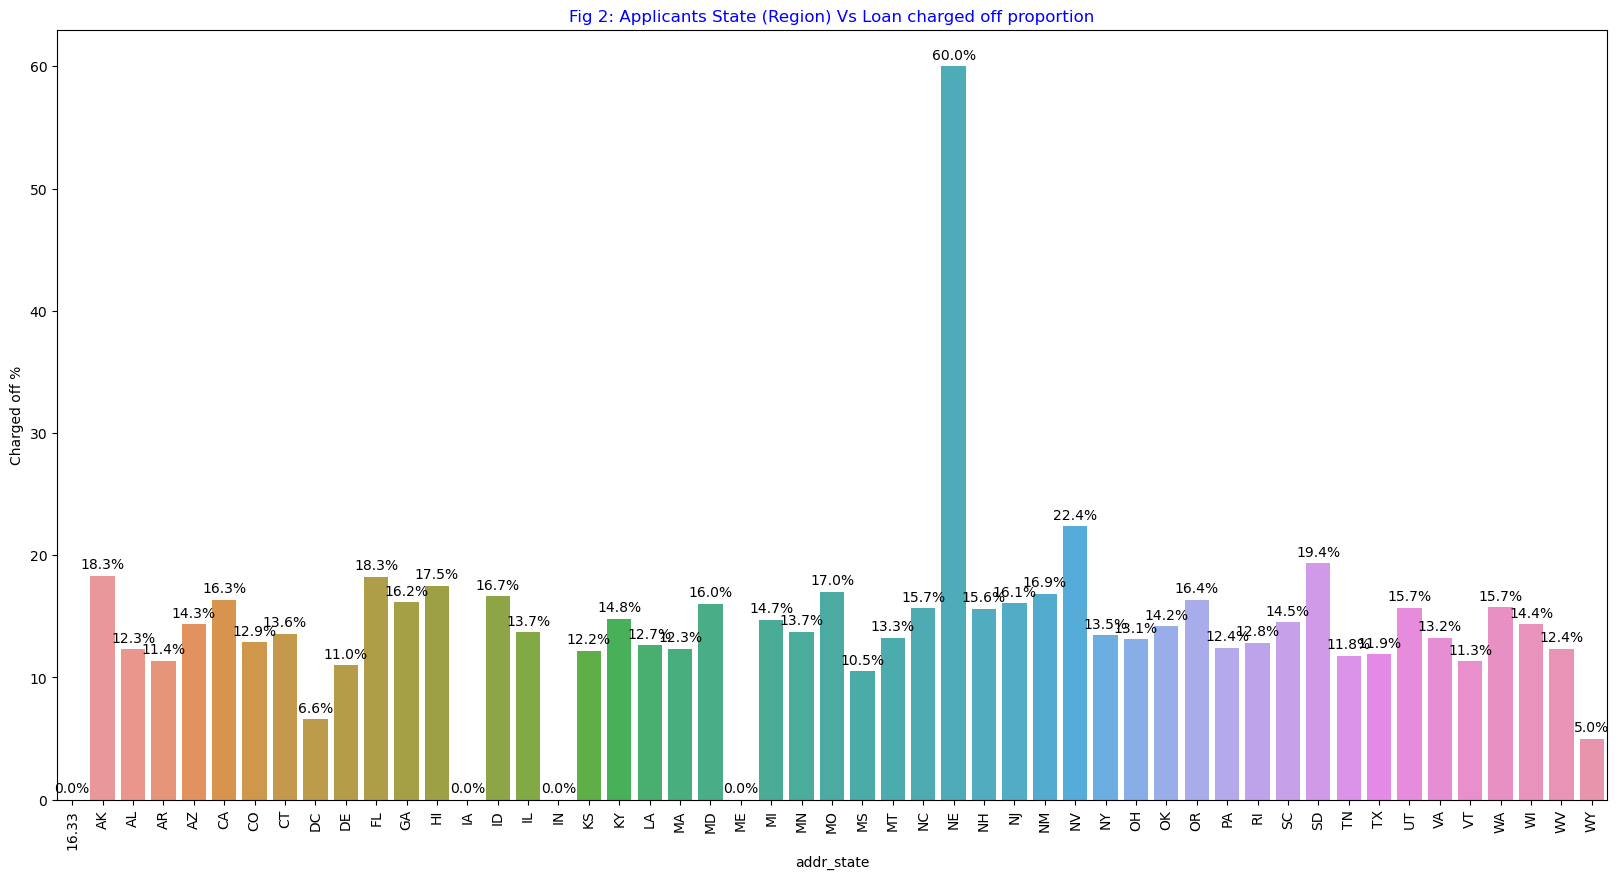

In [211]:
fig, axs = plt.subplots(ncols=1, figsize=(20, 10))
plots=sns.barplot( y="Charged off %", x="addr_state", data=state_vs_loan_status)
for bar in plots.patches:
    percentage=round(bar.get_height(),1)
    plots.annotate(format(str(percentage)+'%'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Fig 2: Applicants State (Region) Vs Loan charged off proportion',color='blue')
plt.xticks(rotation=90)

plt.show()

# Correlation Matrix - Loan dataset

- Annual income has strong corrleation with loan amount whereas the correlation is very weak with interest rate.
- Loan terma have a very good correlation with interest rate and loan amount
- DTI has weak correlation with rest of the fields.

In [137]:
df_corr=df.select_dtypes(include='number')

In [138]:
df_corr=df_corr.drop(['id','member_id'],axis=1)

In [139]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39714 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_amnt           39714 non-null  int64  
 1   funded_amnt         39714 non-null  int64  
 2   funded_amnt_inv     39714 non-null  float64
 3   int_rate            39714 non-null  float64
 4   installment         39714 non-null  float64
 5   annual_inc          39714 non-null  float64
 6   dti                 39714 non-null  float64
 7   inq_last_6mths      39714 non-null  int64  
 8   open_acc            39714 non-null  int64  
 9   pub_rec             39714 non-null  int64  
 10  out_prncp           39714 non-null  float64
 11  out_prncp_inv       39714 non-null  float64
 12  total_pymnt         39714 non-null  float64
 13  total_pymnt_inv     39714 non-null  float64
 14  total_rec_prncp     39714 non-null  float64
 15  total_rec_int       39714 non-null  float64
 16  total_rec

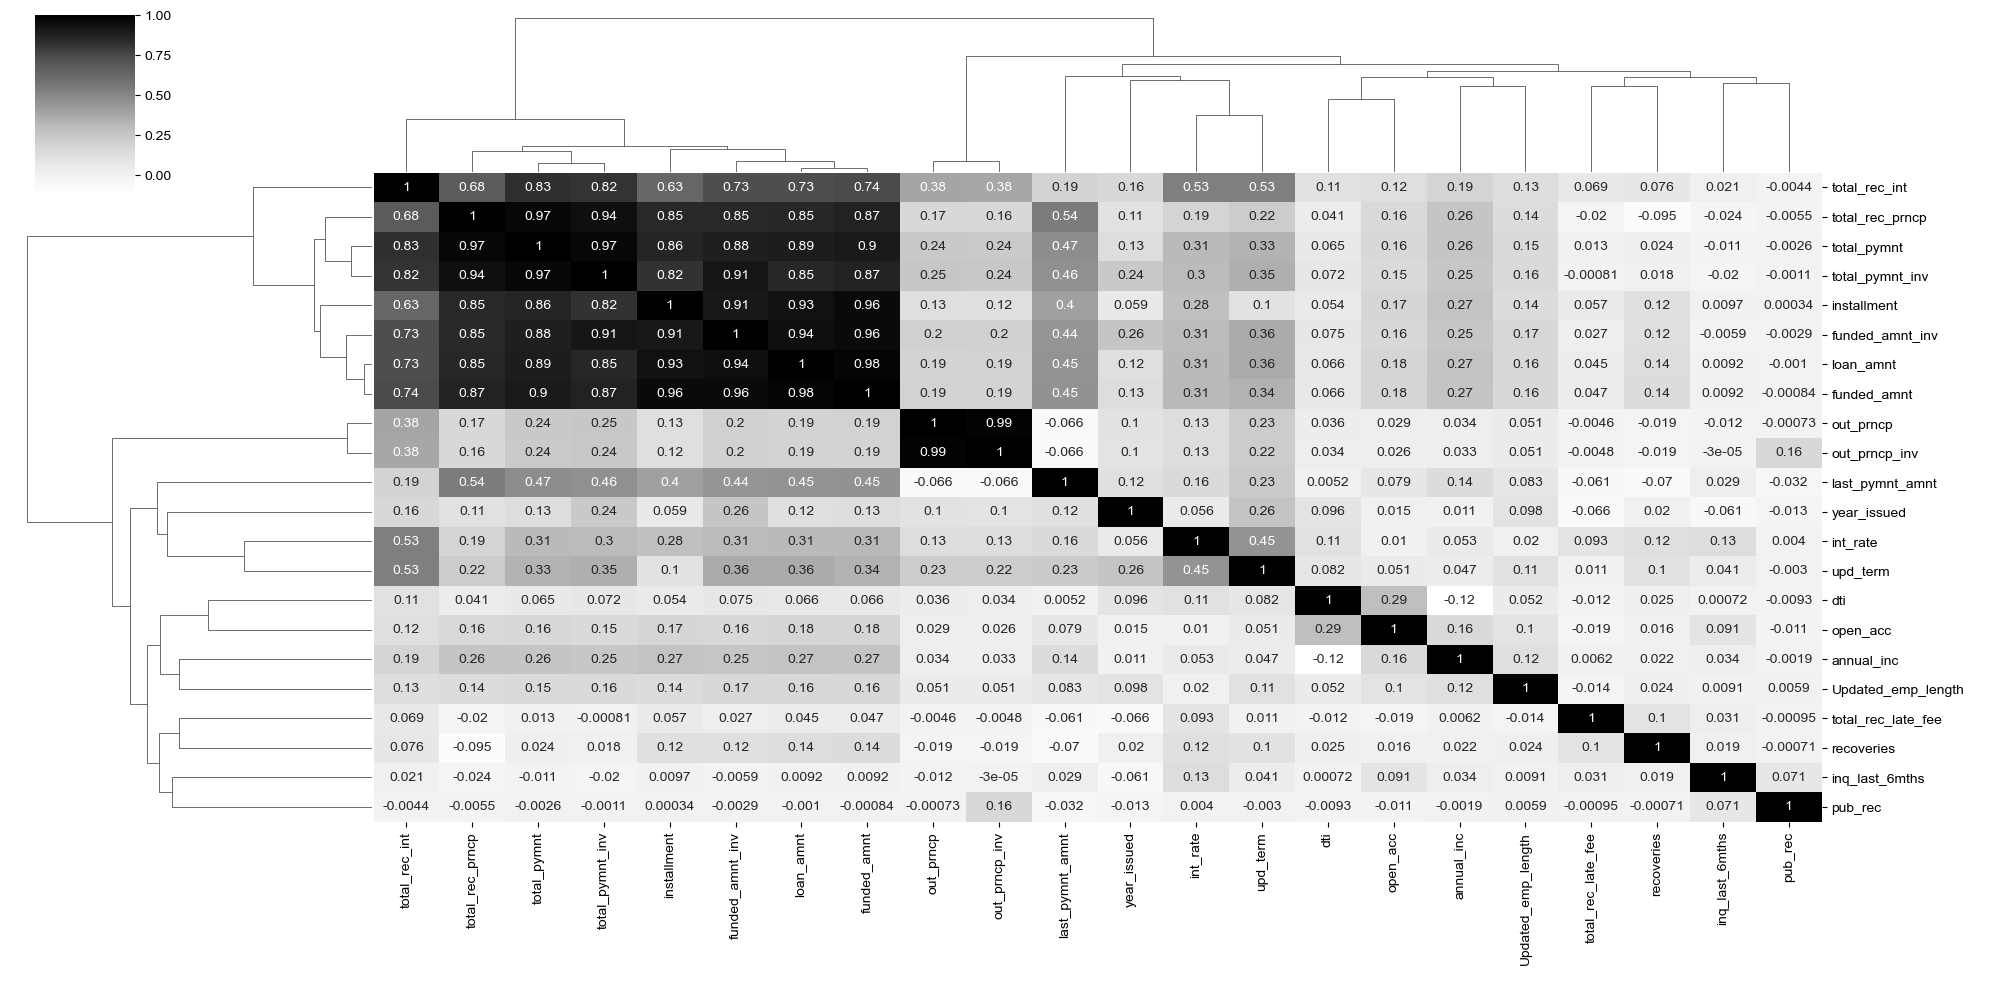

In [140]:
corr =df_corr.corr(method='pearson')
sns.clustermap(corr, annot=True, figsize=(20, 10), cmap="Greys")
sns.set(font_scale=1.1)

### Recommendations post Bivariate analysis

Lending club company should conisder applicants who satisfies the below points as high risk of getting charged off / defaulted. <br>
- Applicants having home ownership status as 'Rent' or 'Mortgage'.
- Applicants opting interest rate between 15%-25%.
- Applicants whose annual income is less than '$40000'.
- Applicants who opt loans for debt consolidation, small business.
- Applicants whose employment length is either 10+ years or less than 1 year.
- Applicants who opted loan term as 60 months.
- Applicants who opt for higher interest grades G (higher grade) --> A (lower grade).
- Applicants from 'California', 'Florida' and 'New York' region.
- Applicants having high DTI ratio.
- Applicants borrowing high loan amount are most likely to be defaulted or charged off.
- Applicants whose income are not verified by the lending company.
